### Fashion MNIST ###

In [14]:
import pandas as pd

In [15]:
fashion_mnist = pd.read_csv("fashion-mnist_train_short.csv")
fashion_mnist.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [16]:
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def GetImage(fashion_mnist, i, is2d=True):
    if is2d:
        return np.reshape(fashion_mnist[fashion_mnist.columns[1:]].iloc[i].values/255, (28,28))
    else:
        return np.reshape(fashion_mnist[fashion_mnist.columns[1:]].iloc[i].values/255, (784))

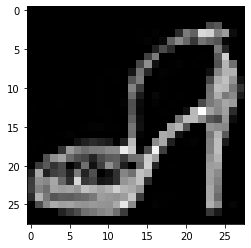

In [17]:
import matplotlib.pyplot as plt
import numpy as np

sample = GetImage(fashion_mnist, 30)
plt.figure()
plt.imshow(sample, 'gray')

In [18]:
try:
    fashion_mnist = pd.read_csv('fashion_mnist_with_image_column.csv', sep=';')
except:
    arr = []

    for i in range(0, len(fashion_mnist.index)):
        arr.append( GetImage(fashion_mnist, i) )

        if i%100 == 0:
            print("{}/{}".format(i, len(fashion_mnist.index)))

    fashion_mnist['image'] = arr

    fashion_mnist.to_csv('fashion_mnist_with_image_column.csv', sep=';', index=False)

In [ ]:
fashion_mnist.head(3)

## Analyzing Feature Importance ##
Using Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(np.array(fashion_mnist['image'].values, dtype=np.float64), np.array(fashion_mnist['label'].values, dtype=np.float64))

sns.heatmap(rnd_clf.feature_importances_, vmin=0, vmax=1, cmap=ListedColormap(['black', 'yellow', 'orange', 'red']))
plt.xlim(0, 28)
plt.ylim(0, 28)
plt.show()